In [3]:
import pickle
import numpy as np

import torch
import torch.nn.functional as F
import torchvision
from torch.utils.tensorboard import SummaryWriter

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
with open('joint_result.pkl', 'rb') as f:
    predictions = pickle.load(f)
    y_pred = [F.softmax(torch.tensor(p), dim=-1).numpy() for p in predictions]
    y_pred = [np.argmax(e) for e in y_pred]

In [5]:
path = 'D:/open-mmlab/mmaction2/data/mmpose/mmpose_raw_final/valid/'
with open(path + 'valid.pkl', 'rb') as f:
    valid_data = pickle.load(f)
    y_real = [int(v['label']) for v in valid_data]

In [6]:
class_names = ['pick up', 'throw', 'sit down', 'stand up',
                   'take off jacket', 'reach into pocket', 'point to something', 
                   'check time (from watch)', 'fall down', 'grab bag', 'hold bag',
                   'leave bag', 'put something into bag', 'put on bag', 'take off bag',
                   'take something out of bag']

In [26]:
def confusion_matrix(y_pred, y_real, class_names, normalize=None):    
    cm = metrics.confusion_matrix(y_real, y_pred, normalize=None)
    # Create a Matplotlib Figure object
    fig, ax = plt.subplots(figsize=(8,4))
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax, fmt='g')

    # calculate f1, precision and recall
    precision, recall, f1, _ = metrics.precision_recall_fscore_support(
        y_real, y_pred, labels=np.arange(16), average=None, zero_division=0)
    
    accuracy = [metrics.accuracy_score([y_real[j] for j in range(len(y_real)) if y_real[j] == i], 
                     [y_pred[j] for j in range(len(y_pred)) if y_real[j] == i]) 
                      for i in range(len(class_names))]

    return fig, f1, precision, recall, accuracy

In [28]:
def plot_figure(x, y, metric):
    
    figure_name = plt.figure()
    figure_name.set_size_inches(6, 4)
    
    # calculate the average Accuracy score
    avg_metric_score = np.mean(y)

    # convert the average Accuracy score to a string and concatenate it with the rest of the title
    title = f"{metric} scores per class\n(Average {metric} score: {avg_metric_score:.1f})"
    
    # create example data
    colors = plt.cm.tab20c(range(len(x)))

    # create a bar chart
    plt.barh(x, y, color=colors)

    # add figures on top of each bar
    for i, v in enumerate(y):
        plt.text(v + 0.03, i + 0.05, str(np.round(v, 1)), ha='center')

    # rotate x-axis tick labels by 90 degrees
    plt.xticks(rotation=90)
    
    # show title
    plt.title(title)

    # display the chart
    plt.show()
    
    return figure_name

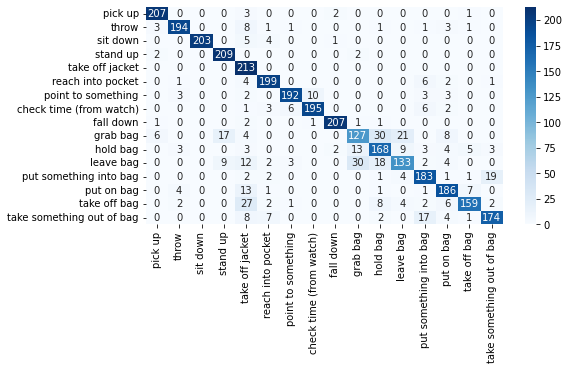

In [29]:
figure, f1, precision, recall, accuracy = confusion_matrix(y_pred, y_real, class_names, normalize=None)

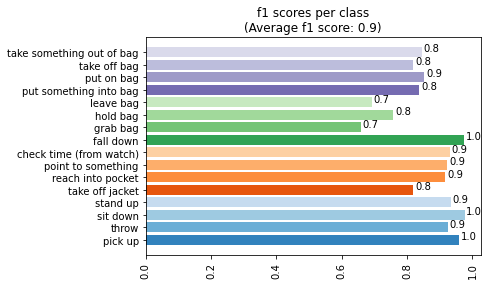

In [19]:
figure_f1 = plot_figure(class_names, f1, 'f1')

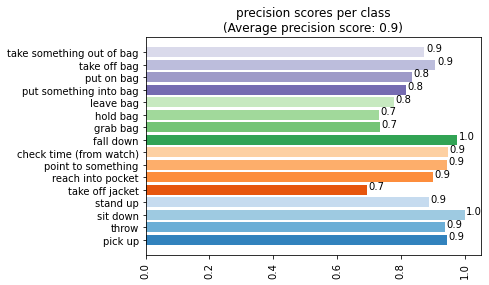

In [21]:
figure_precision = plot_figure(class_names, precision, 'precision')

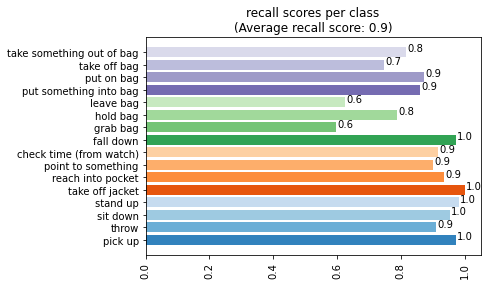

In [22]:
figure_recall = plot_figure(class_names, recall, 'recall')

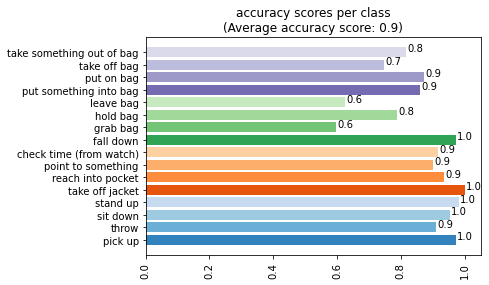

In [23]:
figure_accuracy = plot_figure(class_names, accuracy, 'accuracy')

In [24]:
writer = SummaryWriter()

for n_iter in range(1):
    writer.add_figure('f1_per_class', figure_f1 , n_iter)
    writer.add_figure('precision_per_class', figure_precision , n_iter)
    writer.add_figure('recall_per_class', figure_recall , n_iter)
    writer.add_figure('accuracy_per_class', figure_accuracy , n_iter)
    writer.add_figure('confusion_matrix', figure, n_iter)
writer.close()

In [25]:
accuracy_results = []
accuracy_results += [np.mean(accuracy[:9]), np.mean(accuracy[9:]), np.mean(accuracy)]

f1_results = []
f1_results += [np.mean(f1[:9]), np.mean(f1[9:]), np.mean(f1)]

precision_results = []
precision_results += [np.mean(precision[:9]), np.mean(precision[9:]), np.mean(precision)]

recall_results = []
recall_results += [np.mean(recall[:9]), np.mean(recall[9:]), np.mean(recall)]

total_results = np.vstack([np.round(accuracy_results,2), np.round(f1_results,2), np.round(precision_results,2), np.round(recall_results,2)])
total_results

array([[0.95, 0.76, 0.87],
       [0.93, 0.78, 0.86],
       [0.91, 0.81, 0.87],
       [0.95, 0.76, 0.87]])